## 1. Импорт и обработка данных

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
dataset = load_breast_cancer()
type(dataset)

sklearn.utils.Bunch

In [3]:
# columns = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']

In [4]:
dir (dataset)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
data = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)

In [6]:
data['cancer'] = dataset.target

In [7]:
data.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
237,20.480,21.46,132.50,1306.0,0.08355,0.08348,0.09042,0.06022,0.1467,0.05177,...,26.17,161.70,1750.0,0.1228,0.2311,0.3158,0.1445,0.2238,0.07127,0
36,14.250,21.72,93.63,633.0,0.09823,0.10980,0.13190,0.05598,0.1885,0.06125,...,30.36,116.20,799.6,0.1446,0.4238,0.5186,0.1447,0.3591,0.10140,0
392,15.490,19.97,102.40,744.7,0.11600,0.15620,0.18910,0.09113,0.1929,0.06744,...,29.41,142.10,1359.0,0.1681,0.3913,0.5553,0.2121,0.3187,0.10190,0
128,15.100,16.39,99.58,674.5,0.11500,0.18070,0.11380,0.08534,0.2001,0.06467,...,18.33,105.90,762.6,0.1386,0.2883,0.1960,0.1423,0.2590,0.07779,1
504,9.268,12.87,61.49,248.7,0.16340,0.22390,0.09730,0.05252,0.2378,0.09502,...,16.38,69.05,300.2,0.1902,0.3441,0.2099,0.1025,0.3038,0.12520,1


In [8]:
data.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
cancer                     0
dtype: int64

In [9]:
X = data.drop(['cancer'], axis=1)
y = data['cancer']

## 2. Разделение данных на тренировочные и проверочные
#### устанавливаем _stratify = y_ для обеспечения того, чтобы и в учебном, и в проверочном наборах данных присутствовало бы то же соотношение 0 и 1, что и в исходном наборе данных

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5, random_state=2020, stratify=y)

In [11]:
type(y_train)

pandas.core.series.Series

In [12]:
y_train

250    0
409    1
524    1
203    0
435    0
      ..
206    1
308    1
187    1
359    1
421    1
Name: cancer, Length: 284, dtype: int32

## 3. Масштабирование данных

### _Прежде чем приступать к моделированию, нужно выполнить «центровку» и «стандартизацию» данных путём их масштабирования. Масштабирование выполняется из-за того, что разные величины выражены в разных единицах измерения. Эта процедура позволяет организовать «честную схватку» между признаками при определении их важности_

In [13]:
import numpy as np
from sklearn.preprocessing import StandardScaler

## StandardScaler() нормализует объекты (каждый столбец X, ИНДИВИДУАЛЬНО !!!), так что каждый столбец/функция/переменная будет иметь mean = 0 и standard deviation = 1

In [14]:
X_train_scaled = StandardScaler().fit_transform(X_train) # масштабирование X_train
X_test_scaled = StandardScaler().fit_transform(X_test)   # масштабирование y_train

### _Конвертируем y_train из типа данных Pandas Series в массив, чтобы позже модель смогла работать с соответствующими целевыми показателями_

In [15]:
y_train = pd.Series(y_train).values   # np.array(y_train)
y_train

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1])

## 4. Обучение базовой модели
### Модель №1. Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

In [17]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [18]:
rfc.score(X_train_scaled, y_train)

1.0

In [19]:
rfc.feature_importances_

array([0.06533811, 0.00872325, 0.03954112, 0.0582425 , 0.00416056,
       0.00771396, 0.05858999, 0.06899168, 0.00298425, 0.00631701,
       0.00912593, 0.0027998 , 0.02778206, 0.04195756, 0.00332838,
       0.00459937, 0.00898609, 0.00240346, 0.0040788 , 0.0062929 ,
       0.10137234, 0.00679619, 0.10859557, 0.1403945 , 0.0106334 ,
       0.01813219, 0.05314662, 0.11416318, 0.00991913, 0.0048901 ])

## Визуализация и квантифицирование показателей важности признаков с помощью атрибута feature_importances_

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Feature Importance')

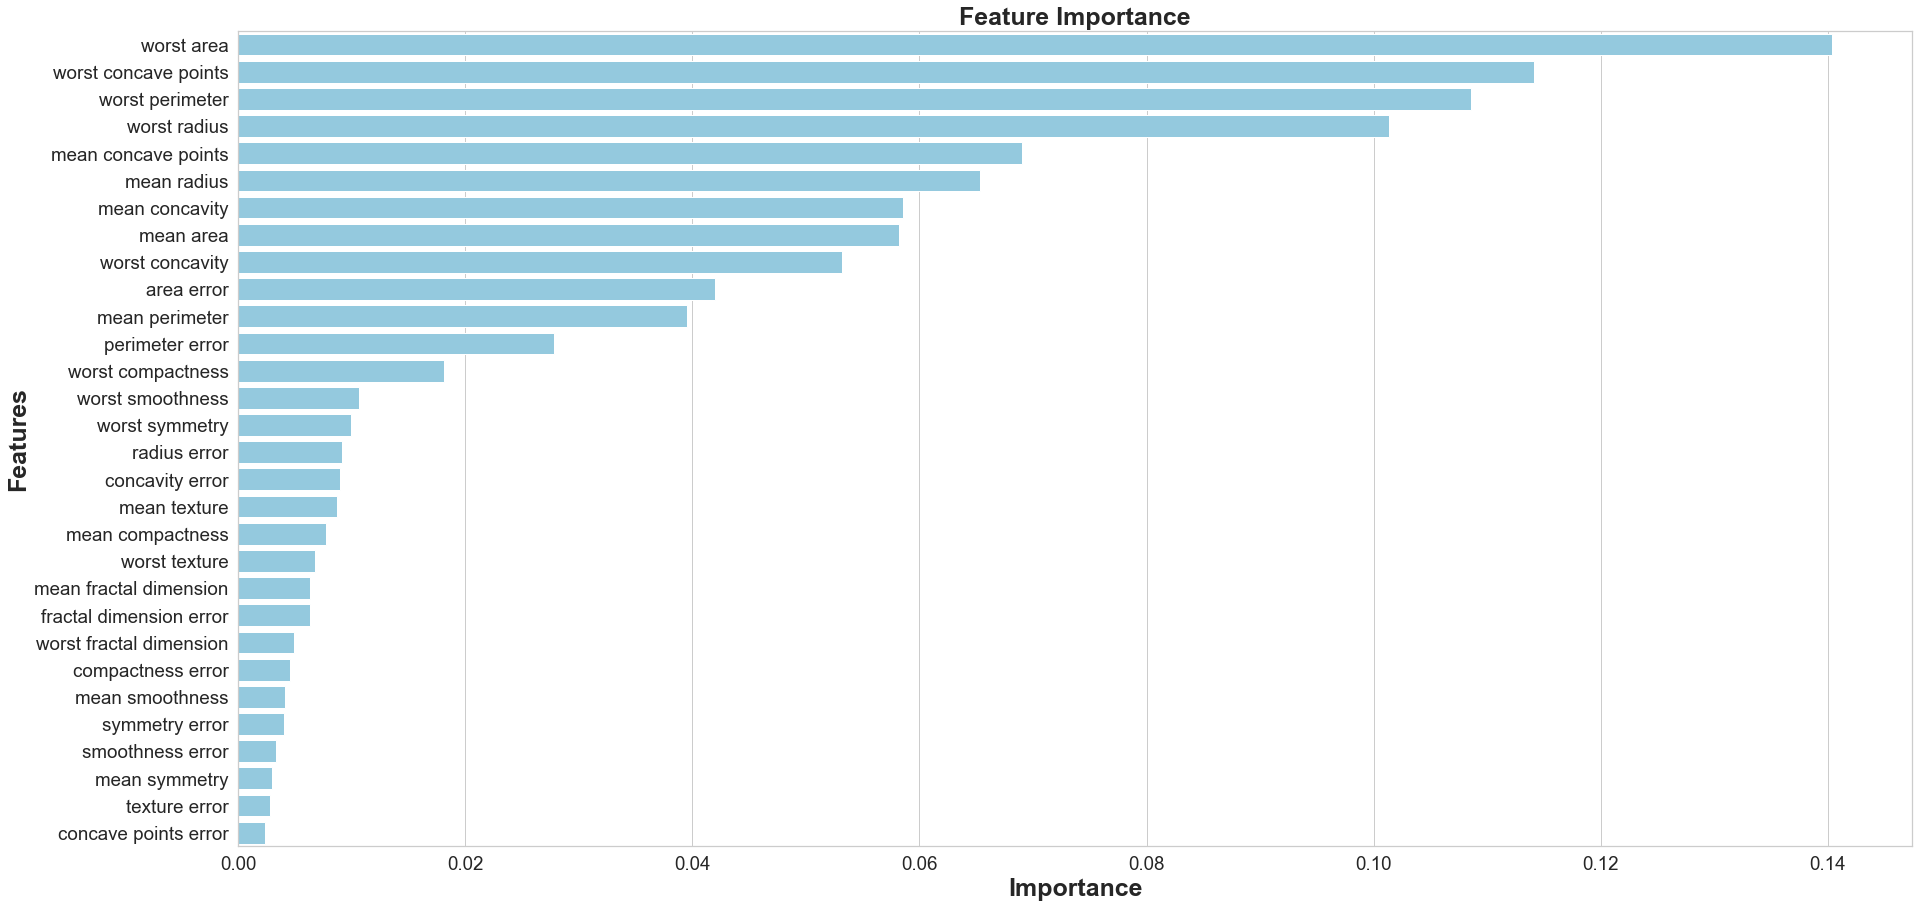

In [21]:
feats = {}
for feature, importance in zip(dataset.feature_names, rfc.feature_importances_):
    feats[feature] = importance
    
feats

importances = pd.DataFrame.from_dict(feats, orient='index').\
rename(columns={0: 'Gini-Importance'}) # получаем DataFrame из dictionary

importances = importances.sort_values(by='Gini-Importance', ascending=False)  # сортировка в сторону возрастания снизу вверх
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')

plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')